In [30]:
import numpy as np
# from sklearn import linear_model
# from sklearn.linear_model.stochastic_gradient import SGDRegressor
# from sklearn.metrics import mean_squared_error, r2_score

from math import exp
from math import log2
from numpy.linalg import inv
# from random import shuffle, random
# from logisticRegression import SGDLogisticTool, myLogisticRegression
 
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0
    # learn a linear univariate regression model by using training inputs (x) and outputs (y) 
    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1
    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]


class MyLinearMultivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []
    # learn a linear univariate regression model by using training inputs (x) and outputs (y)
    def fit(self, x, y):
        sx1 = sum(el[0] for el in x)
        sx2 = sum(el[1] for el in x)
        sy = sum(y)

        meanx1 = sx1 / len(x)
        meanx2 = sx2 / len(x)
        meany = sy / len(y)

        sx1sq = sum(el[0]**2 for el in x)
        sx2sq = sum(el[1]**2 for el in x)

        sx1y = sum(el[0] * ely for (el, ely) in zip(x, y))
        sx2y = sum(el[1] * ely for (el, ely) in zip(x, y))

        sx1x2 = sum(el[0] * el[1] for el in x)

        sx1sqcomp = sx1sq - ( sx1 ** 2 / len(x))
        sx2sqcomp = sx2sq - ( sx2 ** 2 / len(x))

        sx1ycomp = sx1y - ( sx1 * sy / len(x))
        sx2ycomp = sx2y - ( sx2 * sy / len(x))

        sx1x2comp = sx1x2 - ( sx1 * sx2 / len(x))
        
        if (sx1sqcomp * sx2sqcomp == sx1x2comp ** 2):
            sx1x2comp = sx1x2comp + 0.1 / 100 * sx1x2comp

        w2 = (sx1sqcomp * sx2ycomp - sx1x2comp * sx1ycomp) / (sx1sqcomp * sx2sqcomp - sx1x2comp ** 2)
        w1 = (sx2sqcomp * sx1ycomp - sx1x2comp * sx2ycomp) / (sx1sqcomp * sx2sqcomp - sx1x2comp ** 2)
        w0 = meany - w1 * meanx1 - w2 * meanx2
        self.intercept_ = w0
        self.coef_.append(w1)
        self.coef_.append(w2)
    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_[0] * val[0] + self.coef_[1] * val[1] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]

In [4]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import csv

In [23]:
    def loadData(fileName, inputVariabName1, inputVariabName2, outputVariabName):
        data = []
        dataNames = []
        
        print('Current fileName: ' + fileName)
        
        with open(fileName) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    dataNames = row
                else:
                    data.append(row)
                line_count += 1
        # selectedVariable = dataNames.index(inputVariabName1)
        # input1 = [float(data[i][selectedVariable]) for i in range(len(data))]
        #
        # selectedVariable = dataNames.index(inputVariabName2)
        # input2 = [float(data[i][selectedVariable]) for i in range(len(data))]
        #
        # selectedOutput = dataNames.index(outputVariabName)
        # outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

        selectedVariable1 = dataNames.index(inputVariabName1)
        selectedVariable2 = dataNames.index(inputVariabName2)
        selectedOutput = dataNames.index(outputVariabName)

        input1 = []
        input2 = []
        outputs = []

        for i in range(len(data)):
            try:
                a1 = float(data[i][selectedVariable1])
                a2 = float(data[i][selectedVariable2])
                a3 = float(data[i][selectedOutput])

                input1.append(a1)
                input2.append(a2)
                outputs.append(a3)

            except ValueError:
                continue

        return input1, input2, outputs

In [7]:
    def plotDataHistogram(x, variableName):
        n, bins, patches = plt.hist(x, 10)
        plt.title('Histogram of ' + variableName)
        plt.show()

In [33]:
    def plotData(x1, y1, x2=None, y2=None, x3=None, y3=None, title=None):
        plt.plot(x1, y1, 'ro', label='train data')
        if (x2):
            plt.plot(x2, y2, 'b-', label='learnt model')
        if (x3):
            plt.plot(x3, y3, 'g^', label='test data')
        plt.title(title)
        plt.legend()
        plt.show()

In [34]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data') 
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model') 
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

In [35]:
def program(givenFile):
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'data', givenFile)

    # inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
    input1, input2, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')
    print('in1:  ', input1[:5])
    print('in2:  ', input2[:5])
    print('out: ', outputs[:5])

    # see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'data', givenFile)

    input1, input2, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')
    # inputs, outputs = loadData(filePath, 'Freedom', 'Happiness.Score')

    plotDataHistogram(input1, 'capita GDP')
    plotDataHistogram(input2, 'Freedom')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(input1, outputs, [], [], [], [], 'capita vs. happiness')
    plotData(input2, outputs, [], [], [], [], 'freedom vs. happiness')

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(input1))]
    trainSample = np.random.choice(indexes, int(0.8 * len(input1)), replace=False)
    validationSample = [i for i in indexes if not i in trainSample]
    trainInputs1 = [input1[i] for i in trainSample]
    trainInputs2 = [input2[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    validationInputs1 = [input1[i] for i in validationSample]
    validationInputs2 = [input2[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    plotData(trainInputs1, trainOutputs, [], [], validationInputs1, validationOutputs, "train and test data (PIB)")
    plotData(trainInputs2, trainOutputs, [], [], validationInputs2, validationOutputs, "train and test data (Libertate)")

    # training step
    xx1 = [[el] for el in trainInputs1]
    xx2 = [[el] for el in trainInputs2]

    xx = []
    sum1 = 0
    sum2 = 0
    for i in range(0, len(trainInputs1)):
        l = []
        l.append(trainInputs1[i])
        sum1 += trainInputs1[i]
        l.append(trainInputs2[i])
        sum2 += trainInputs2[i]
        xx.append(l)

    # xx = [xx1, xx2]
    regressor = linear_model.LinearRegression()
    # regressor = linear_model.SGDRegressor(max_iter =  10000)
    regressor.fit(xx, trainOutputs)
    s1 = sum(el[0] for el in xx)
    s2 = sum(el[1] for el in xx)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print( 'y = ' + str(w0) + ' + ' + str(w1) + ' * x1' + ' + ' + str(w2) + ' * x2')
    
    # plot the model
    noOfPoints = 1000
    xref1 = []
    xref2 = []
    val1 = min(trainInputs1)
    val2 = min(trainInputs2)
    step1 = (max(trainInputs1) - min(trainInputs1)) / noOfPoints
    step2 = (max(trainInputs2) - min(trainInputs2)) / noOfPoints
    for i in range(1, noOfPoints):
        xref1.append(val1)
        xref2.append(val2)
        val1 += step1
        val2 += step2
    # rez = [w0 + w1 * el + w2 * el2 for (el, el2) in (xref1, xref2)]
    # plotData(trainInputs1, trainOutputs, (xref1, xref2), (yref1, yref2), [], [], title="train data and model")
    pass
    # makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    # makes predictions for test data (by tool)

    xx2 = []

    for i in range(0, len(validationInputs1)):
        l = []
        l.append(validationInputs1[i])
        l.append(validationInputs2[i])
        xx2.append(l)

    # computedValidationOutputs = regressor.predict([[x] for x in validationInputs1])
    computedValidationOutputs = regressor.predict(xx2)
    # plotData([], [], validationInputs1, computedValidationOutputs, validationInputs1, validationOutputs,
    #          "predictions vs real test data")

    # compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputs):
        error += (t1 - t2) ** 2
    error = error / len(validationOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(validationOutputs, computedValidationOutputs)
    print("prediction error (tool): ", error)

    # # using developed code
#     from myRegression import MyLinearUnivariateRegression
#     from myRegression import MyLinearMultivariateRegression

#     model initialisation
    regressor = MyLinearMultivariateRegression()
    # training the model by using the training inputs and known training outputs
    regressor.fit(xx, trainOutputs)
    # save the model parameters
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print('the learnt model: f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')

    # plot the model
    # numerical representation of the regressor model
    noOfPoints = 50
    xref1 = []
    val = min(trainInputs1)
    step1 = (max(trainInputs1) - min(trainInputs1)) / noOfPoints
    for _ in range(1, noOfPoints):
        for _ in range(1, noOfPoints):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(trainInputs2)
    step2 = (max(trainInputs2) - min(trainInputs2)) / noOfPoints
    for _ in range(1, noOfPoints):
        aux = val
        for _ in range(1, noOfPoints):
            xref2.append(aux)
            aux += step2
    yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
    plot3Ddata(trainInputs1, trainInputs2, trainOutputs, xref1, xref2, yref, [], [], [],
               'train data and the learnt model')
    
    # makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    # makes predictions for test data (by tool)

    xx2 = []

    for i in range(0, len(validationInputs1)):
        l = []
        l.append(validationInputs1[i])
        l.append(validationInputs2[i])
        xx2.append(l)

    # computedValidationOutputs = regressor.predict([[x] for x in validationInputs1])
    computedValidationOutputs = regressor.predict(xx2)
    # plotData([], [], validationInputs1, computedValidationOutputs, validationInputs1, validationOutputs,
    #          "predictions vs real test data")

    # compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputs):
        error += (t1 - t2) ** 2
    error = error / len(validationOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(validationOutputs, computedValidationOutputs)
    print("prediction error (tool): ", error)

# v1_world-happiness-report-2017

Current fileName: C:\Users\Andrei\Desktop\UBB\Semestru 4\Inteligență artificială\Laboratoare\Lab 7\data\v1_world-happiness-report-2017.csv
in1:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
in2:   [0.635422587394714, 0.626006722450256, 0.627162635326385, 0.620070576667786, 0.617950856685638]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]
Current fileName: C:\Users\Andrei\Desktop\UBB\Semestru 4\Inteligență artificială\Laboratoare\Lab 7\data\v1_world-happiness-report-2017.csv


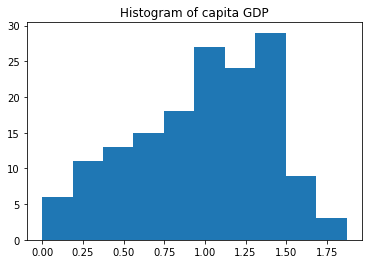

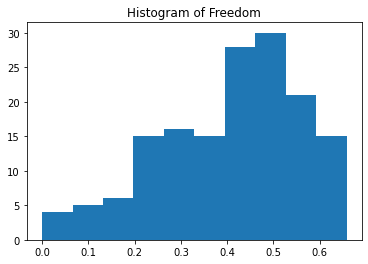

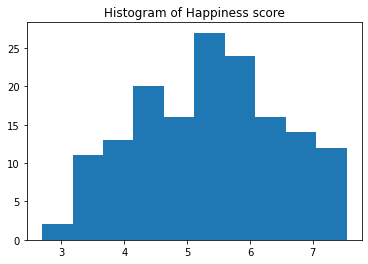

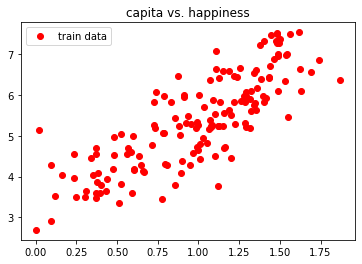

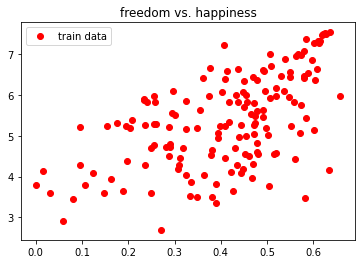

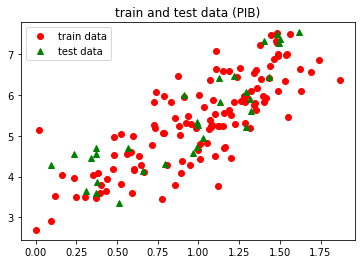

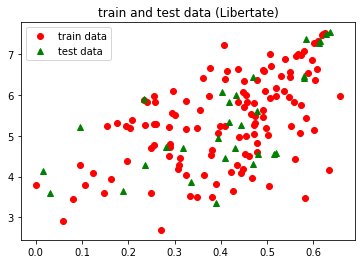

y = 2.5283663171908204 + 1.876338735881281 * x1 + 2.3147487475033257 * x2
prediction error (manual):  0.27782674347210035
prediction error (tool):  0.27782674347210035
the learnt model: f(x) =  2.528366317190816 + 1.876338735881273 * x1 + 2.3147487475033555 * x2


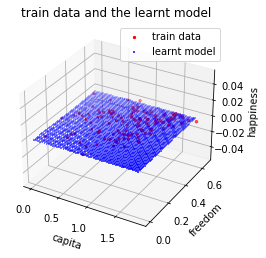

prediction error (manual):  0.2778267434721003
prediction error (tool):  0.2778267434721003


In [36]:
file_name = "v1_world-happiness-report-2017.csv"
program(file_name)

# v2_world-happiness-report-2017

Current fileName: C:\Users\Andrei\Desktop\UBB\Semestru 4\Inteligență artificială\Laboratoare\Lab 7\data\v2_world-happiness-report-2017.csv
in1:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in2:   [0.808231592, 0.741191506, 0.74031651, 0.782489777, 0.721785963]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]
Current fileName: C:\Users\Andrei\Desktop\UBB\Semestru 4\Inteligență artificială\Laboratoare\Lab 7\data\v2_world-happiness-report-2017.csv


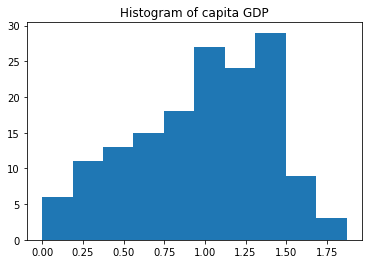

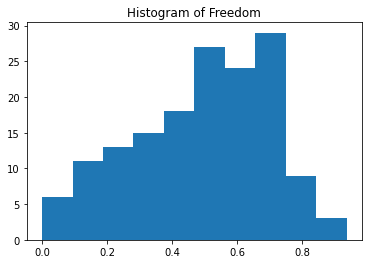

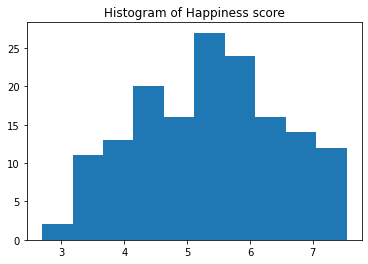

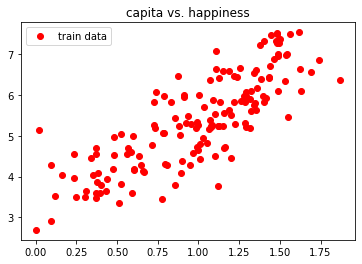

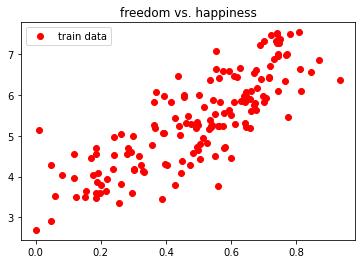

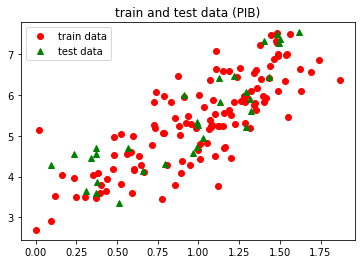

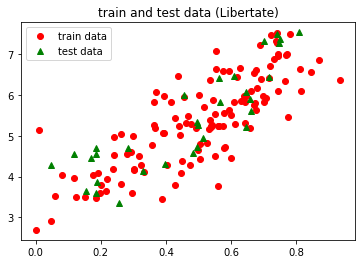

y = 3.2007585995651677 + -68611.73423348347 * x1 + 137227.76917586513 * x2
prediction error (manual):  0.41421024306370874
prediction error (tool):  0.4142102430637088
the learnt model: f(x) =  3.2018445631295873 + 1.0746357303221412 * x1 + 2.14927146050508 * x2


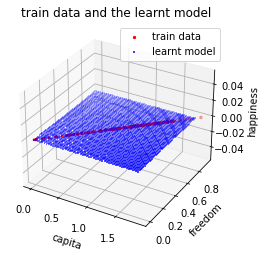

prediction error (manual):  0.41426991697161314
prediction error (tool):  0.4142699169716132


In [37]:
file_name = "v2_world-happiness-report-2017.csv"
program(file_name)

# v3_world-happiness-report-2017

Current fileName: C:\Users\Andrei\Desktop\UBB\Semestru 4\Inteligență artificială\Laboratoare\Lab 7\data\v3_world-happiness-report-2017.csv
in1:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in2:   [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]
Current fileName: C:\Users\Andrei\Desktop\UBB\Semestru 4\Inteligență artificială\Laboratoare\Lab 7\data\v3_world-happiness-report-2017.csv


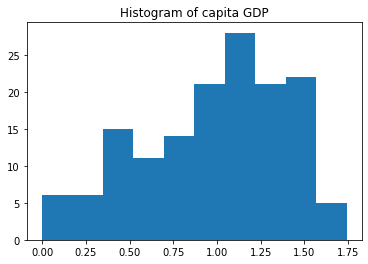

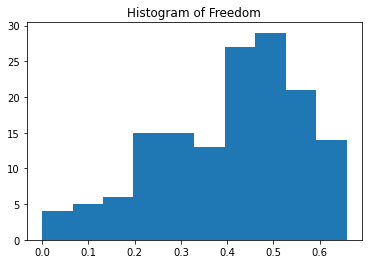

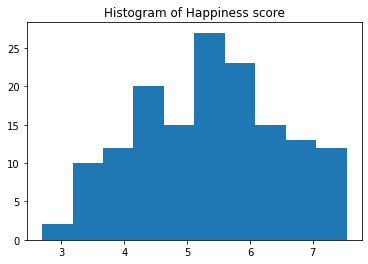

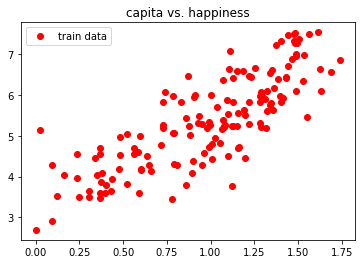

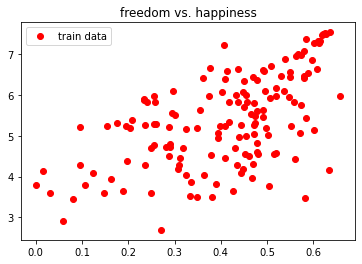

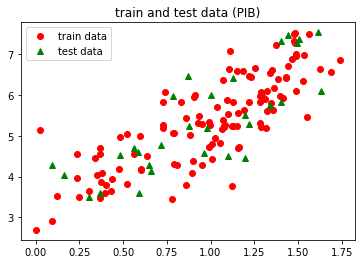

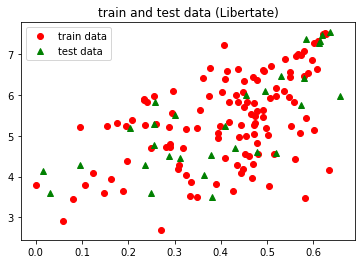

y = 2.546696109833419 + 1.9208590344194252 * x1 + 2.24055150677719 * x2
prediction error (manual):  0.3239053614564407
prediction error (tool):  0.3239053614564407
the learnt model: f(x) =  2.5466961098333813 + 1.9208590344194325 * x1 + 2.2405515067772623 * x2


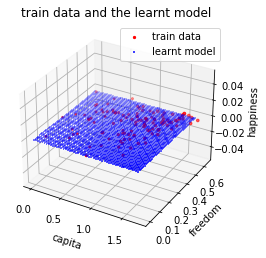

prediction error (manual):  0.3239053614564393
prediction error (tool):  0.3239053614564393


In [38]:
file_name = "v3_world-happiness-report-2017.csv"
program(file_name)